<a href="https://colab.research.google.com/github/FaustoJuarez/Machine-Learning-Journey/blob/main/20230710_tesis_pruebainicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount GDrive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
ROOT_DIR = '/content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8'

In [2]:
cd /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8


/content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8


In [3]:
ls

20230710_tesis_pruebainicial.ipynb  README.dataset.txt   test/   valid/
data.yaml                           README.roboflow.txt  train/


# Install Ultralytics

In [4]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 38.5 MB/s eta 0:00:00


# Train Model - Experimento 2

In [9]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=25)  # train the model



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

#Evaluate Experiment 2 on validation images

In [23]:
!yolo \
task = detect \
mode = val \
model= runs/detect/train3/weights/best.pt \
name = yolov8n_eval_val\
data = data.yaml

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/labels.cache... 111 images, 0 backgrounds, 0 corrupt: 100% 111/111 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:19<00:00,  2.85s/it]
                   all        111       1996      0.527      0.504      0.449      0.184
                    MR        111        251      0.387       0.28      0.273      0.089
                    NC        111        131      0.365      0.527      0.348      0.118
                    WF        111        978      0.312      0.474      0.264     0.0802
                   fly        111        207      0.351      0.783      0.595       0.25
             fruit-fly        111         25          1          0       0.25     0.0758
            fruitflies        111

#Inference on validation images


In [25]:
!yolo \
task = detect \
mode = predict \
model= runs/detect/train3/weights/best.pt \
source= /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images \
imgsz= 640 \
name=yolov8n_inference_pred \
show_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients

image 1/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1001_jpg.rf.b46c2791a215ea1d645260955f609a35.jpg: 448x640 36 WFs, 1 fly, 51.1ms
image 2/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1005_jpg.rf.21f2d45f33a576515823ec62f6b61e53.jpg: 448x640 17 WFs, 7.9ms
image 3/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1007_jpg.rf.f3fcc795f7c82427b2ff8331715bdf5b.jpg: 448x640 16 WFs, 6.7ms
image 4/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1010_jpg.rf.647649e08eed4528444cfc8695a385a8.jpg: 448x640 4 WFs, 8.4ms
image 5/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1014_jpg.rf.2869b8bf27921fc5e2cf7b147f0decae.jpg: 448

# Visualize validation results


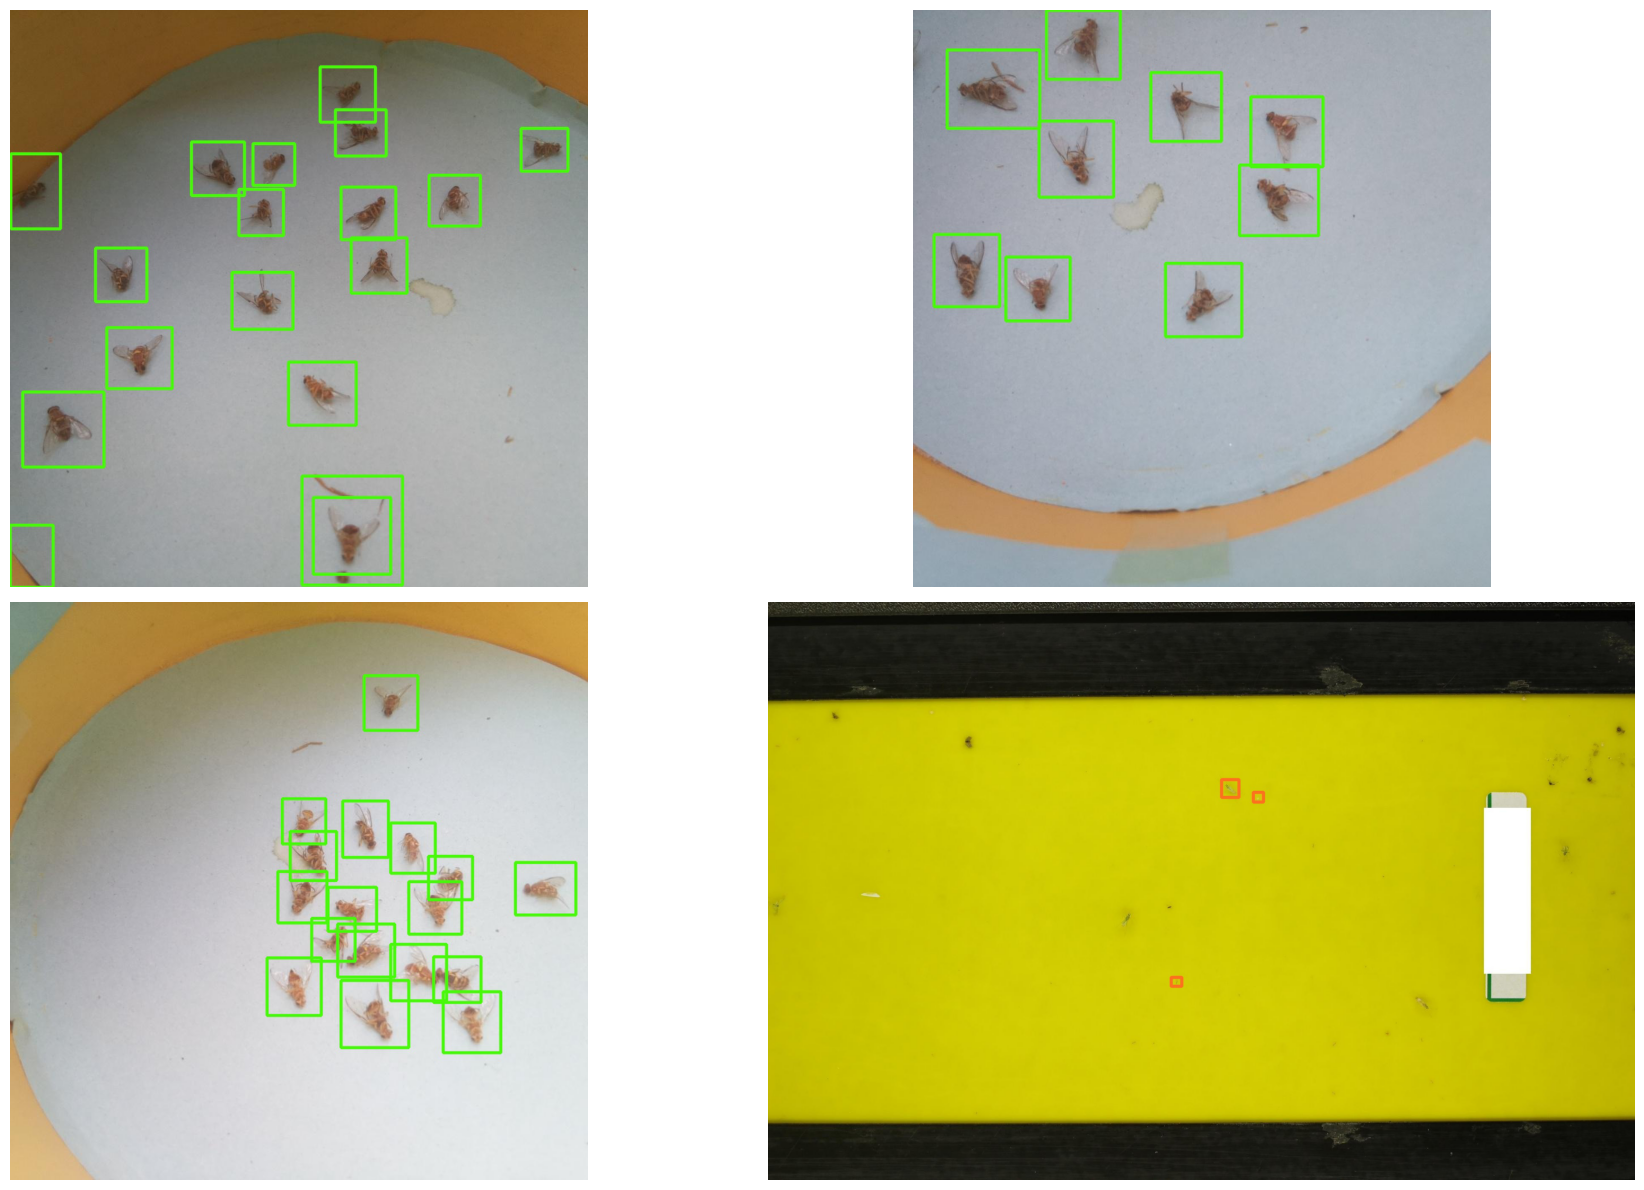

In [27]:
visualize('runs/detect/yolov8n_inference_pred2')

In [28]:
!yolo \
task = detect \
mode = predict \
model= runs/detect/train3/weights/best.pt \
source= /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/stickytrap5.jpg \
imgsz= 640 \
name=yolov8n_inference_pred \
show_labels=True

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients

image 1/1 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/stickytrap5.jpg: 640x320 2 WFs, 61.5ms
Speed: 2.0ms preprocess, 61.5ms inference, 87.5ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/yolov8n_inference_pred3


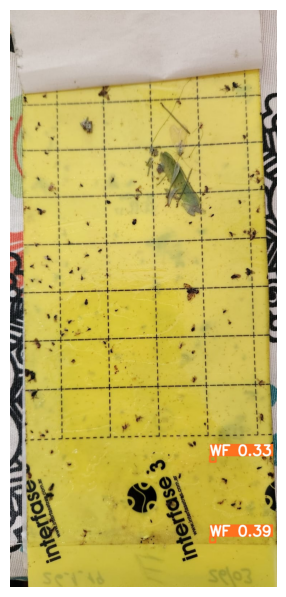

In [29]:
visualize('runs/detect/yolov8n_inference_pred3')

In [38]:
!yolo \
task = detect \
mode = predict \
model= runs/detect/train3//weights/best.pt \
source= /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images \
imgsz= 640 \
name=yolov8n_test_pred \
show_labels=True

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients

image 1/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1000_jpg.rf.3ee38b30c3ee4047540694f0f16eede3.jpg: 448x640 1 MR, 37 WFs, 53.1ms
image 2/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1033_jpg.rf.c3aa292f90876a262617da1d7ad58415.jpg: 448x640 2 NCs, 6.1ms
image 3/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1038_jpg.rf.7d63058a2ff969e28c96c074a039b2b4.jpg: 448x640 1 NC, 1 WF, 6.1ms
image 4/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1040_jpg.rf.4bca3dedec3ede7f323646ede101f787.jpg: 448x640 5 NCs, 6.1ms
image 5/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1045_jpg.rf.36b8acb54e5373c8cb23138c3e8311d2.jpg: 448x640 2 NCs, 1 WF, 6.0ms
image 6/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1058_jpg.rf.f3bd67638770f23f957dd1e8c169cd

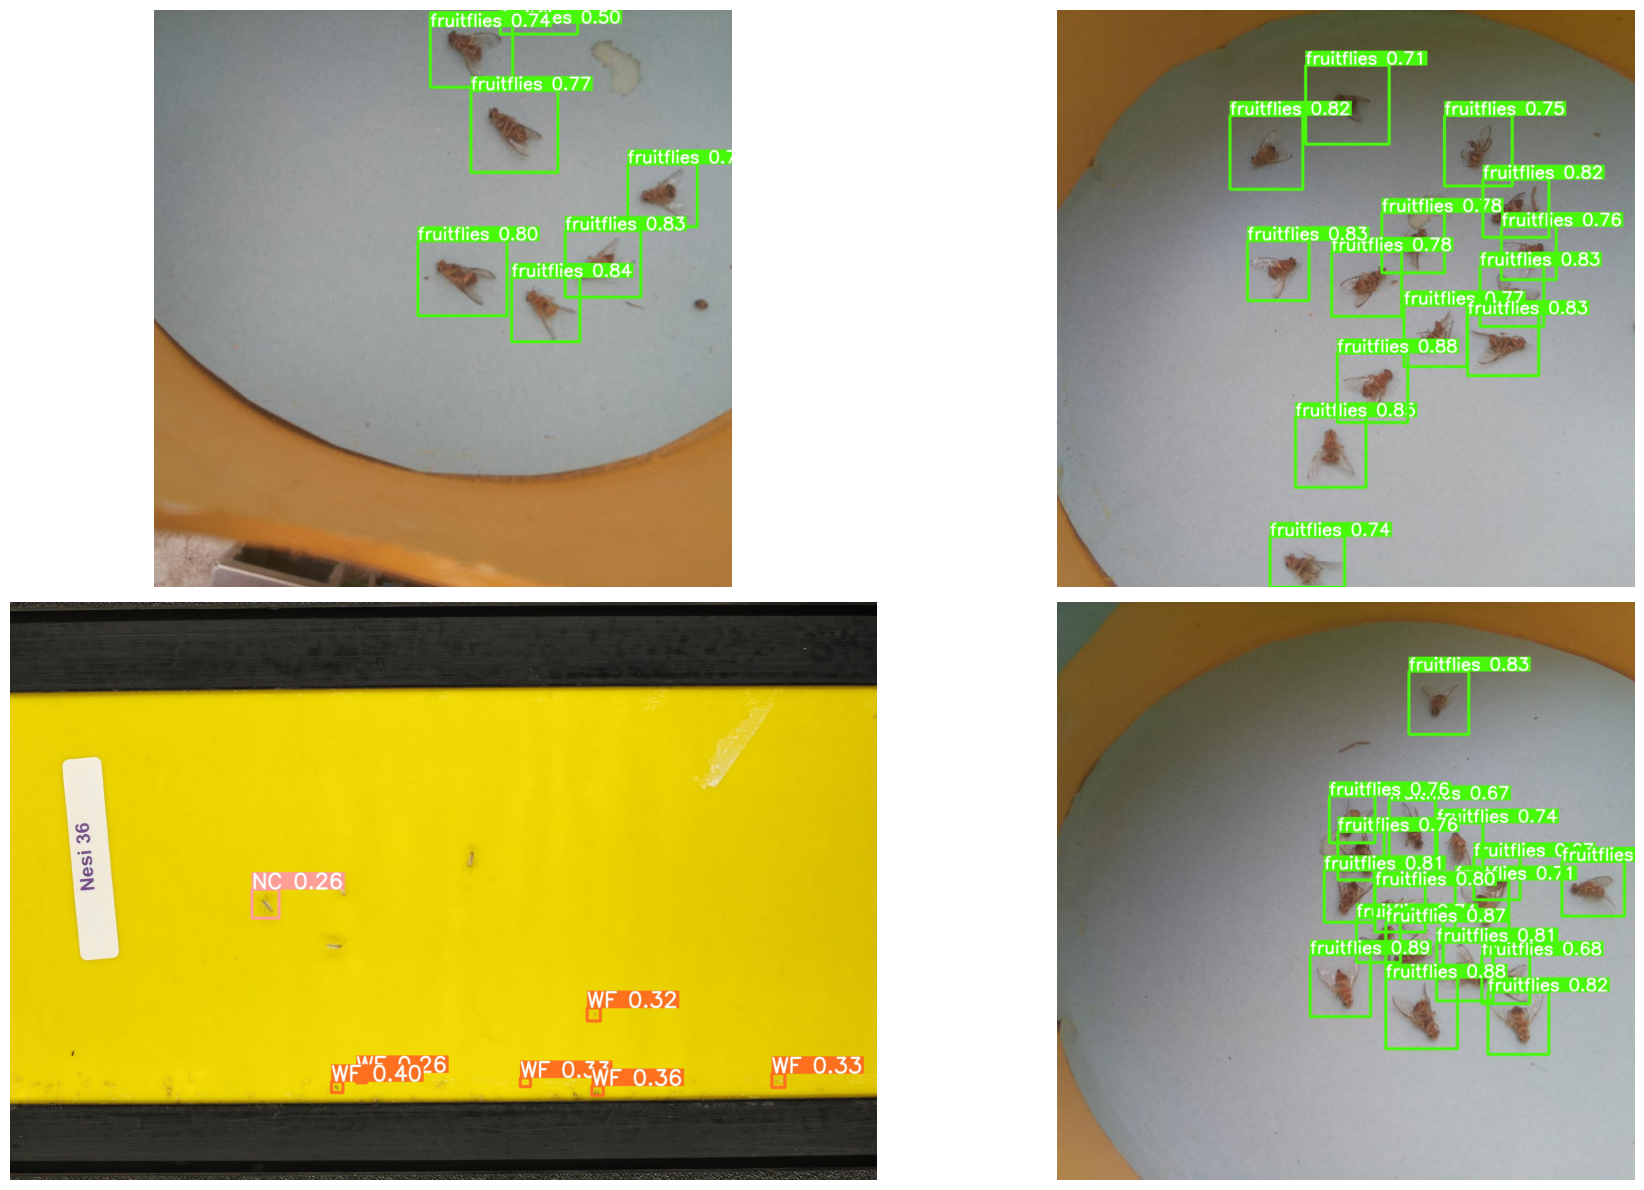

In [39]:
visualize('runs/detect/yolov8n_test_pred')

# Train Model - Experimento 3

In [11]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8m.yaml")  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=25)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

In [15]:
import locale
print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [16]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

#Evaluate Experiment 3 on validation images

In [17]:
!yolo \
task = detect \
mode = val \
model= runs/detect/train4/weights/best.pt \
name = yolov8m_eval_val\
data = data.yaml

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients
val: Scanning /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/labels.cache... 111 images, 0 backgrounds, 0 corrupt: 100% 111/111 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:23<00:00,  3.31s/it]
                   all        111       1996      0.681       0.56       0.57      0.237
                    MR        111        251       0.57       0.46      0.512      0.196
                    NC        111        131      0.646      0.595      0.612      0.267
                    WF        111        978      0.534      0.543      0.442      0.137
                   fly        111        207      0.498      0.807      0.654      0.278
             fruit-fly        111         25          1          0      0.241     0.0695
            fruitflies        11

#Inference on validation images

In [18]:
!ls


20230710_tesis_pruebainicial.ipynb  README.roboflow.txt  train
data.yaml			    runs		 valid
README.dataset.txt		    test		 yolov8n.pt


In [34]:
!yolo \
task = detect \
mode = predict \
model= runs/detect/train4/weights/best.pt \
source= /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images \
imgsz= 640 \
name=yolov8m_inference_pred \
show_labels=True

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients

image 1/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1001_jpg.rf.b46c2791a215ea1d645260955f609a35.jpg: 448x640 8 MRs, 35 WFs, 64.4ms
image 2/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1005_jpg.rf.21f2d45f33a576515823ec62f6b61e53.jpg: 448x640 28 WFs, 37.3ms
image 3/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1007_jpg.rf.f3fcc795f7c82427b2ff8331715bdf5b.jpg: 448x640 21 WFs, 27.9ms
image 4/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1010_jpg.rf.647649e08eed4528444cfc8695a385a8.jpg: 448x640 1 NC, 2 WFs, 27.9ms
image 5/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/1014_jpg.rf.2869b8bf27921fc5e2cf7b147f0decae.jpg: 448x640 3 NCs, 27.9ms
image 6/111 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/valid/images/101_3_jpg.rf.78424d034d94e2

# Visualize validation results

In [20]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [26]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

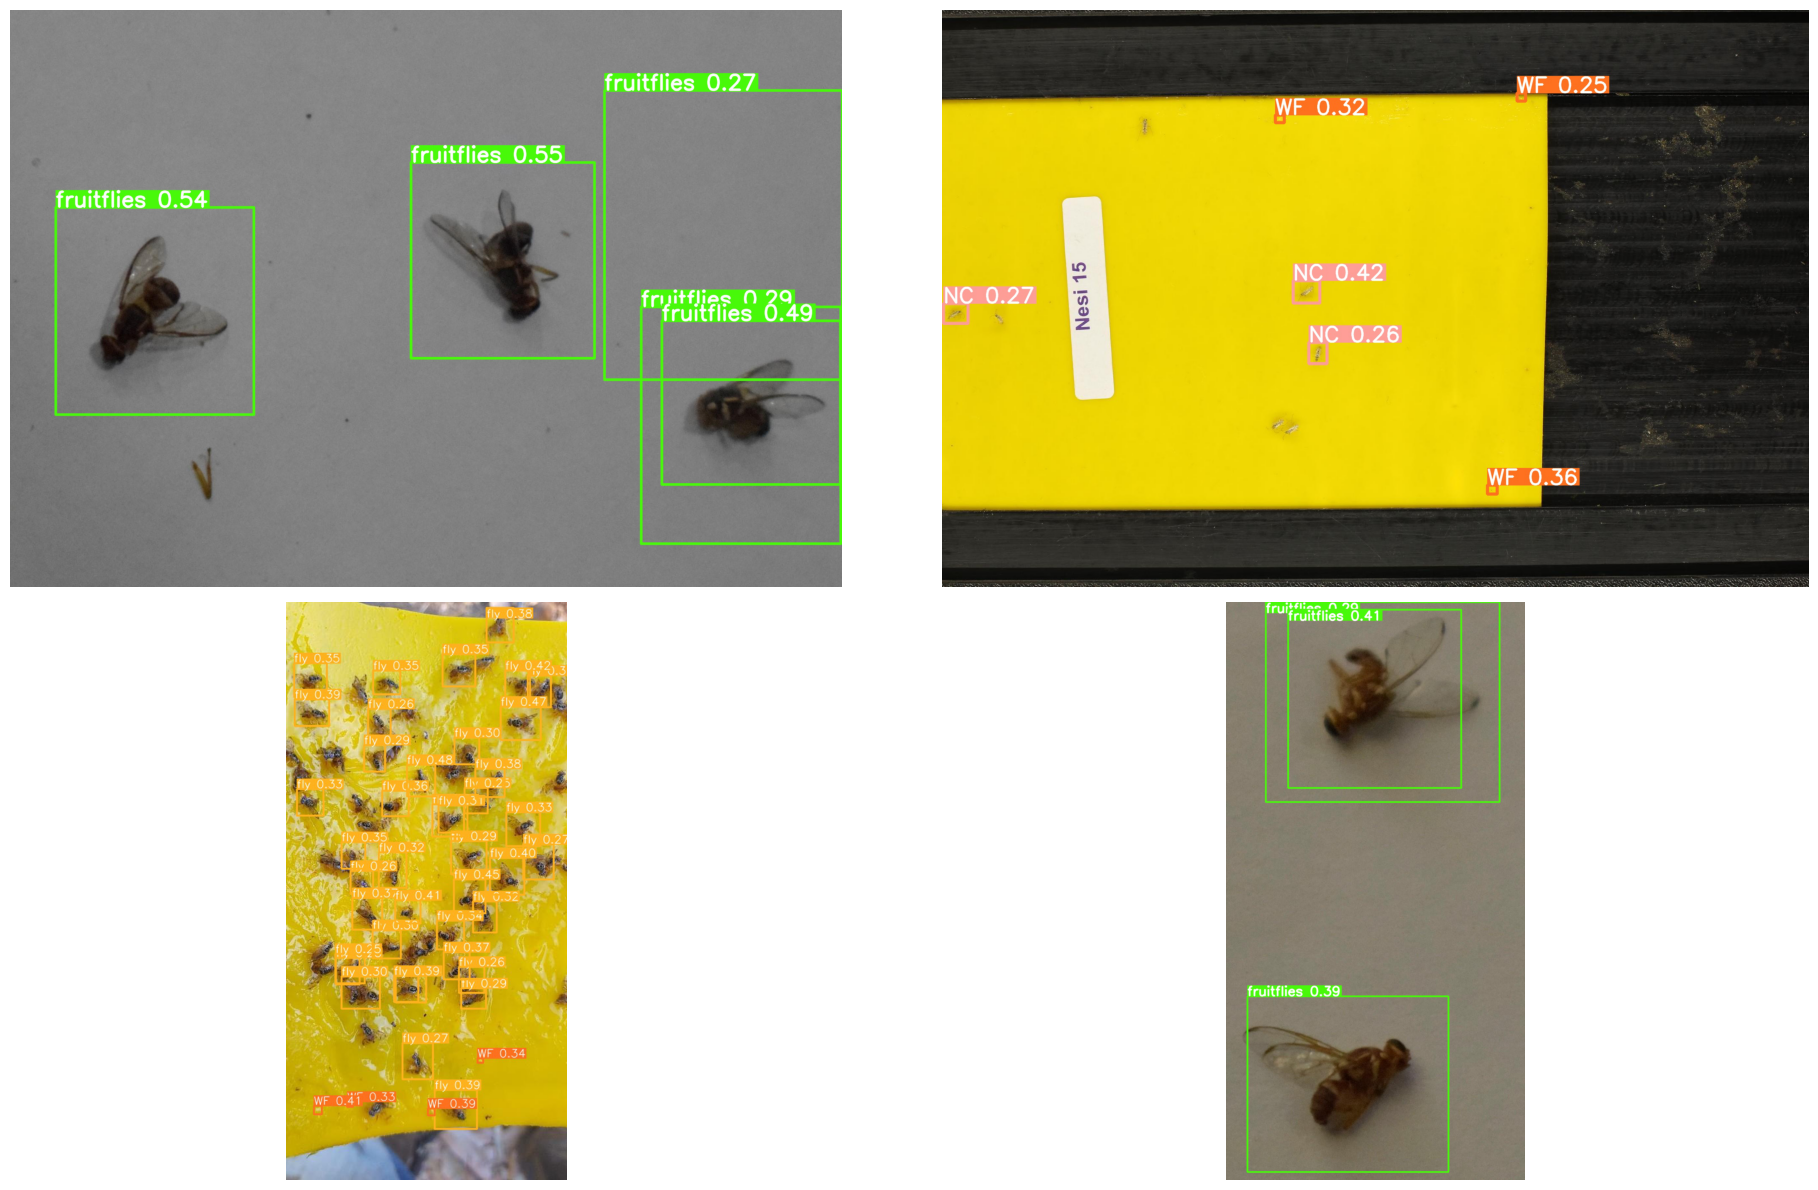

In [35]:
visualize('runs/detect/yolov8m_inference_pred4')

In [30]:
!yolo \
task = detect \
mode = predict \
model= runs/detect/train4/weights/best.pt \
source= /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/stickytrap5.jpg \
imgsz= 640 \
name=yolov8m_inference_pred \
show_labels=True

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients

image 1/1 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/stickytrap5.jpg: 640x320 3 WFs, 67.7ms
Speed: 2.0ms preprocess, 67.7ms inference, 93.3ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/yolov8m_inference_pred2


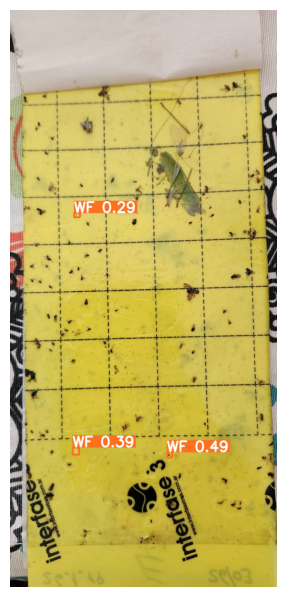

In [31]:
visualize('runs/detect/yolov8m_inference_pred2')

In [32]:
!yolo \
task = detect \
mode = predict \
model= runs/detect/train4/weights/best.pt \
source= /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/Whitefly_372_png_jpg.rf.db4712340464dbb24329dc62096fd936.jpg \
imgsz= 640 \
name=yolov8m_inference_pred \
show_labels=True

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients

image 1/1 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/Whitefly_372_png_jpg.rf.db4712340464dbb24329dc62096fd936.jpg: 640x640 (no detections), 37.5ms
Speed: 4.9ms preprocess, 37.5ms inference, 13.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolov8m_inference_pred3


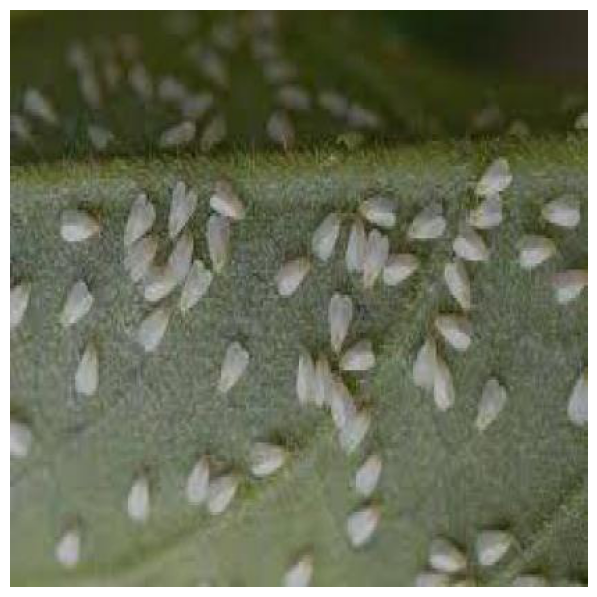

In [33]:
visualize('runs/detect/yolov8m_inference_pred3')

In [36]:
!yolo \
task = detect \
mode = predict \
model= runs/detect/train4/weights/best.pt \
source= /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images \
imgsz= 640 \
name=yolov8m_test_pred \
show_labels=True

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients

image 1/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1000_jpg.rf.3ee38b30c3ee4047540694f0f16eede3.jpg: 448x640 2 MRs, 47 WFs, 97.7ms
image 2/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1033_jpg.rf.c3aa292f90876a262617da1d7ad58415.jpg: 448x640 2 NCs, 1 WF, 27.9ms
image 3/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1038_jpg.rf.7d63058a2ff969e28c96c074a039b2b4.jpg: 448x640 2 NCs, 1 WF, 27.9ms
image 4/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1040_jpg.rf.4bca3dedec3ede7f323646ede101f787.jpg: 448x640 8 NCs, 1 WF, 27.8ms
image 5/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1045_jpg.rf.36b8acb54e5373c8cb23138c3e8311d2.jpg: 448x640 8 NCs, 28.0ms
image 6/86 /content/gdrive/MyDrive/Tesis/Bichos.v2i.yolov8/test/images/1058_jpg.rf.f3bd67638770f23f9

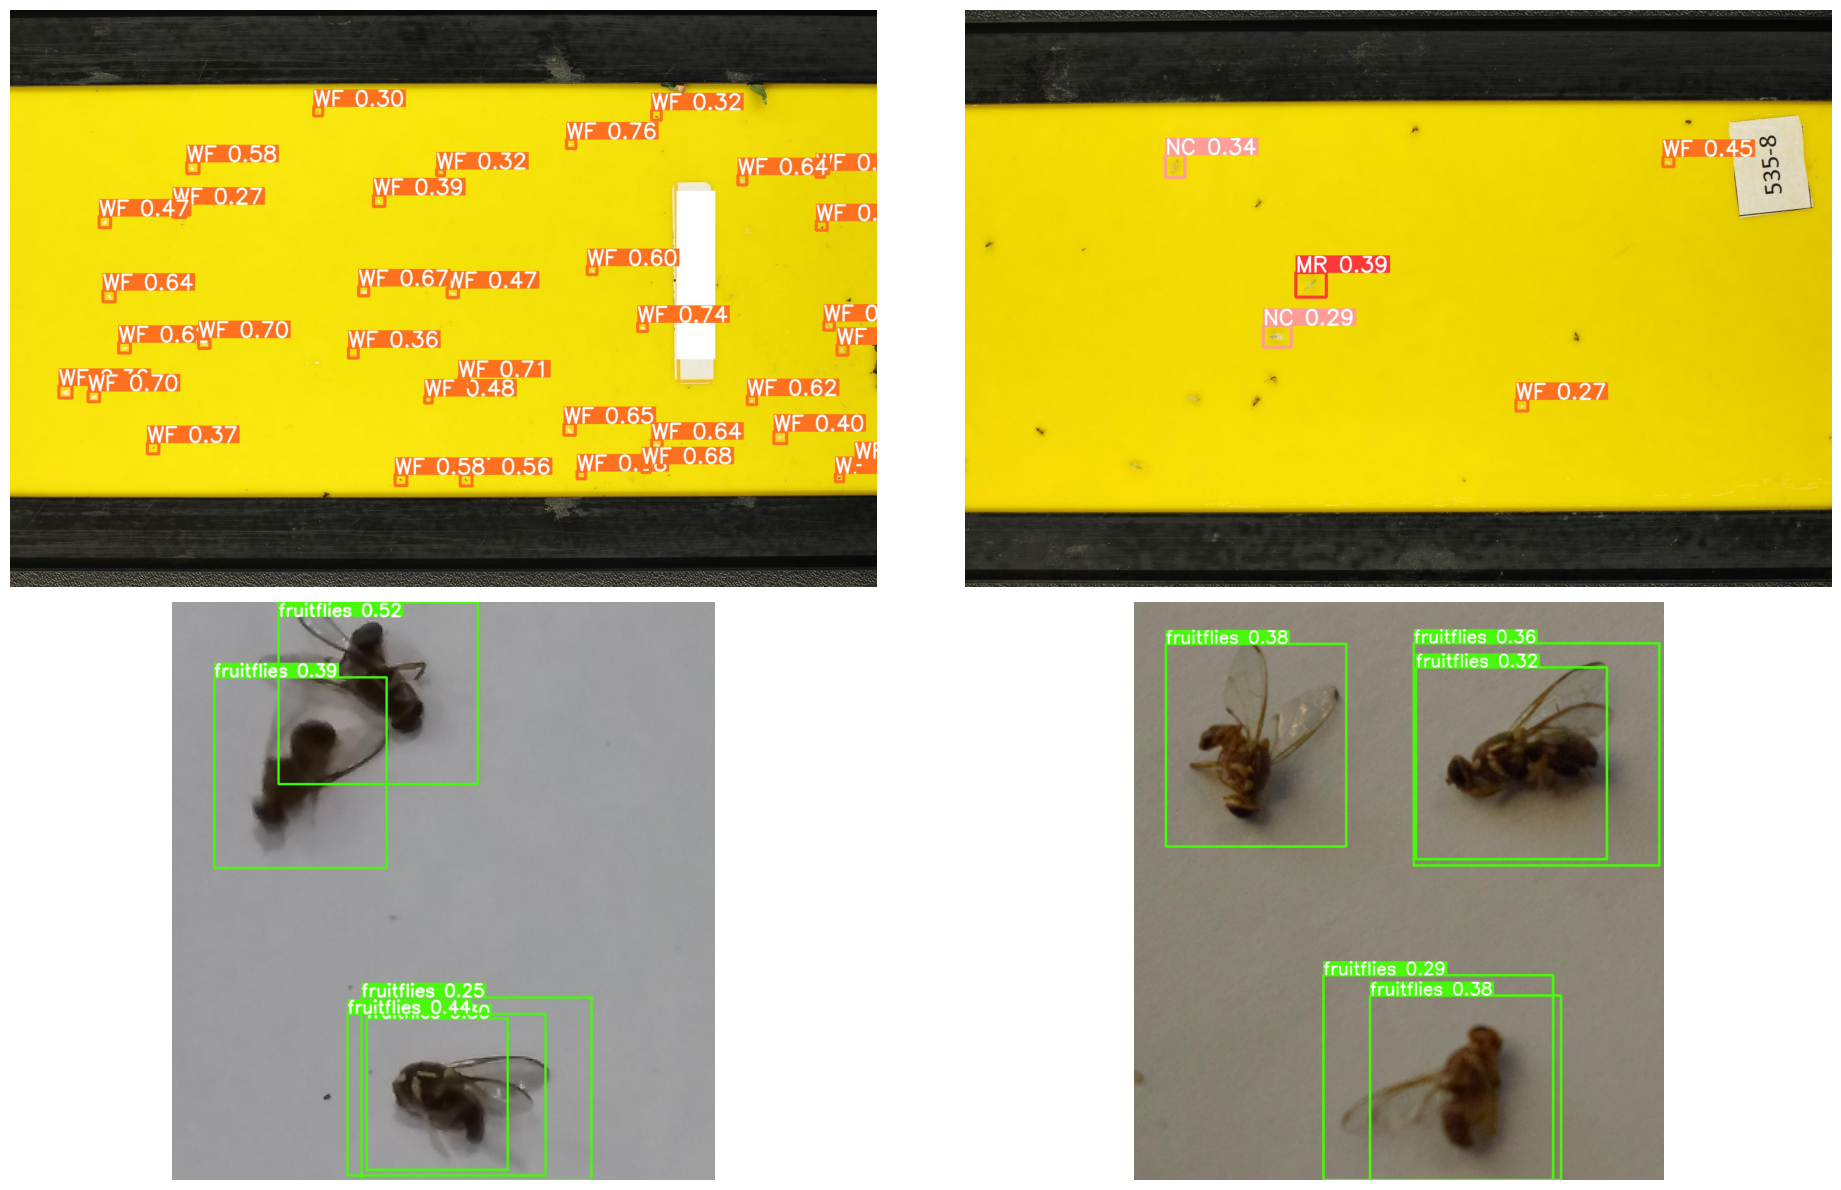

In [37]:
visualize('runs/detect/yolov8m_test_pred')